# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ivanny Putri Marianto
- **Email:** ivannyputri@students.usu.ac.id
- **ID Dicoding:** ivanny_pm

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah musim berpengaruh terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Di bulan apa penyewaan sepeda mencapai jumlah tertinggi?
- Pertanyaan 3 : Bagaimana perbandingan penyewaan sepeda bulanan pada tahun 2011 dan 2012?
- Pertanyaan 4 : Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Tabel Day**

In [54]:
bike_day_df = pd.read_csv('dataset/day.csv')
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Tabel Hour**

In [55]:
bike_hour_df = pd.read_csv('dataset/hour.csv')
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari tabel *day*, lebih membahas ringkasan penyewaan harian sehingga kita bisa gunakan datanya untuk membandingkan penyewaan lebih banyak di hari kerja atau akhir pekan
- Dari tabel *hour*,lebih rinci membahas penyewaan sepeda per jam sehingga kita bisa menganalisis lebih spesifik seperti jam puncak penyewaan sepeda dan pengaruh cuaca dalam penyewaan dan masih banyak lagi

### Assessing Data

**Bike Daily Data**

1. Melakukan pengecekan informasi terhadap data *day.csv*

In [56]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Melakukan pengecekan *missing value* pada data *day.csv*

In [57]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3. Memunculkan jumlah data duplikat pada data *day.csv*

In [58]:
print("Jumlah Data Duplikat : ",bike_day_df.duplicated().sum())

Jumlah Data Duplikat :  0


**Bike Hour Data**

1. Melakukan pengecekan informasi terhadap data *hour.csv*

In [59]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Melakukan pengecekan *missing value* pada data *hour.csv*

In [60]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3. Memunculkan jumlah data duplikat pada data *hour.csv*

In [61]:
print("Jumlah Data Duplikat : ",bike_hour_df.duplicated().sum())

Jumlah Data Duplikat :  0


**Insight:**

Hasil dari Assesing Data 
- Kolom *dteday* seharusnya menggunakan format *datetime* (mengubah dari tipe data *object* ke *datetime*)
- Tidak ditemukan *missing value* dari kedua tabel yaitu *bike_day_df* dan *bike_hour_df*
- Tidak terdapat data yang duplikat dari kedua tabel yaitu *bike_day_df* dan *bike_hour_df*

### Cleaning Data

Proses *cleaning data* hanya mengubah satu tipe data yaitu *dteday*. Tipe data *dteday* diubah daru *object* menjadi *datetime* supaya dapat mempermudah proses analisis data.

In [62]:
bike_day_df['dteday'] = pd.to_datetime(bike_day_df['dteday'])
bike_day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [63]:
bike_hour_df['dteday'] = pd.to_datetime(bike_hour_df['dteday'])
bike_hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Mengubah tipe data *dteday* pada tabel *bike_day_df* dan *bike_hour_df* dari *object* menjadi *datetime*

## Exploratory Data Analysis (EDA)

### Explore Data *bike_day_df*

In [64]:
bike_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [65]:
# Menghitung jumlah berdasarkan musim 
season_trend = bike_day_df.groupby("season")["cnt"].sum()

# Mapping label
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Ganti index angka jadi label
season_trend.index = season_trend.index.map(season_labels)

# Membuat DataFrame untuk tampilan tabel
season_table = pd.DataFrame({"Musim": season_trend.index, "Jumlah Penyewaan": season_trend.values})

# Menampilkan tabel
display(season_table)

,Musim,Jumlah Penyewaan
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


Berdasarkan tabel diatas, maka dapat kita simpulkan musim itu berpengaruh terhadap jumlah penyewaan sepeda dan lebih banyak orang yang menyewa sepeda pada saat musim gugur.

In [66]:
# Menghitung total peminjaman per bulan
monthly_trend = bike_day_df.groupby("mnth")[["cnt"]].sum()

# Mapping month labels
month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

# Ganti angka bulan dengan label bulan
monthly_trend.index = monthly_trend.index.map(month_labels)

# Menampilkan tabel
display(monthly_trend) 


,cnt
mnth,
Jan,134933
Feb,151352
Mar,228920
Apr,269094
May,331686
Jun,346342
Jul,344948
Aug,351194
Sep,345991


Pada tabel diatas, dapat kita simpulkan bahwa pada bulan agustus merupakan puncak dari penyewaan sepeda.

In [67]:
# Menghitung total peminjaman per bulan untuk tiap tahun
monthly_year_trend = bike_day_df.groupby(["yr", "mnth"])["cnt"].sum().unstack()

# Mapping angka bulan ke nama bulan
month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
monthly_year_trend.columns = monthly_year_trend.columns.map(month_labels)

# Ubah indeks tahun (0 -> 2011, 1 -> 2012)
monthly_year_trend = monthly_year_trend.rename(index={0: "2011", 1: "2012"}).sort_index()

# Menampilkan tabel
display(monthly_year_trend)

mnth,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
yr,,,,,,,,,,,,
2011,38189,48215,64045,94870,135821,143512,141341,136691,127418,123511,102167,87323
2012,96744,103137,164875,174224,195865,202830,203607,214503,218573,198841,152664,123713


Dari tabel diatas, dapat kita simpulkan bahwa tahun 2012 mengalami peningkatan pesat dalam jumlah penyewaan sepeda dibandingkan tahun 2011 di setiap bulan.

In [68]:
# Menghitung rata-rata penyewaan berdasarkan hari kerja & akhir pekan
workingday_trend = bike_day_df.groupby("workingday")["cnt"].mean()

# Mapping label untuk kategori hari
workingday_labels = {0: "Akhir Pekan", 1: "Hari Kerja"}
workingday_trend.index = workingday_trend.index.map(workingday_labels)

# Ubah jadi DataFrame & reset index biar lebih rapi
workingday_trend = workingday_trend.to_frame().reset_index()
workingday_trend.columns = ["Kategori", "Rata-rata Penyewaan"]

# Menampilkan tabel
display(workingday_trend)


,Kategori,Rata-rata Penyewaan
0,Akhir Pekan,4330.168831
1,Hari Kerja,4584.820000


Pada tabel diatas, dapat kita simpulkan bahwa cenderung orang menyewa sepeda pada hari kerja di bandingkan akhir pekan.

### Explore Data *bike_hour_df*

In [69]:
bike_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [70]:
# Menghitung jumlah berdasarkan musim 
season_trend = bike_hour_df.groupby("season")["cnt"].sum()

# Mapping label
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Ganti index angka jadi label
season_trend.index = season_trend.index.map(season_labels)

# Membuat DataFrame untuk tampilan tabel
season_table = pd.DataFrame({"Musim": season_trend.index, "Jumlah Penyewaan": season_trend.values})

# Menampilkan tabel
display(season_table)

,Musim,Jumlah Penyewaan
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


Berdasarkan tabel diatas, maka dapat kita simpulkan musim itu berpengaruh terhadap jumlah penyewaan sepeda dan lebih banyak orang yang menyewa sepeda pada saat musim gugur.

In [71]:
# Menghitung total peminjaman per bulan
monthly_trend = bike_hour_df.groupby("mnth")[["cnt"]].sum()

# Mapping month labels
month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

# Ganti angka bulan dengan label bulan
monthly_trend.index = monthly_trend.index.map(month_labels)

# Menampilkan tabel
display(monthly_trend) 


,cnt
mnth,
Jan,134933
Feb,151352
Mar,228920
Apr,269094
May,331686
Jun,346342
Jul,344948
Aug,351194
Sep,345991


Pada tabel diatas, dapat kita simpulkan bahwa pada bulan agustus merupakan puncak dari penyewaan sepeda.

In [72]:
# Menghitung total peminjaman per bulan untuk tiap tahun
monthly_year_trend = bike_hour_df.groupby(["yr", "mnth"])["cnt"].sum().unstack()

# Mapping angka bulan ke nama bulan
month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
monthly_year_trend.columns = monthly_year_trend.columns.map(month_labels)

# Ubah indeks tahun (0 -> 2011, 1 -> 2012)
monthly_year_trend = monthly_year_trend.rename(index={0: "2011", 1: "2012"}).sort_index()

# Menampilkan tabel
display(monthly_year_trend)

mnth,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
yr,,,,,,,,,,,,
2011,38189,48215,64045,94870,135821,143512,141341,136691,127418,123511,102167,87323
2012,96744,103137,164875,174224,195865,202830,203607,214503,218573,198841,152664,123713


Dari tabel diatas, dapat kita simpulkan bahwa tahun 2012 mengalami peningkatan pesat dalam jumlah penyewaan sepeda dibandingkan tahun 2011 di setiap bulan.

In [73]:
# Menghitung rata-rata penyewaan berdasarkan hari kerja & akhir pekan
workingday_trend = bike_hour_df.groupby("workingday")["cnt"].mean()

# Mapping label untuk kategori hari
workingday_labels = {0: "Akhir Pekan", 1: "Hari Kerja"}
workingday_trend.index = workingday_trend.index.map(workingday_labels)

# Ubah jadi DataFrame & reset index biar lebih rapi
workingday_trend = workingday_trend.to_frame().reset_index()
workingday_trend.columns = ["Kategori", "Rata-rata Penyewaan"]

# Menampilkan tabel
display(workingday_trend)


,Kategori,Rata-rata Penyewaan
0,Akhir Pekan,181.405332
1,Hari Kerja,193.207754


Pada tabel diatas, dapat kita simpulkan bahwa cenderung orang menyewa sepeda pada hari kerja di bandingkan akhir pekan.

**Insight:**
- Kebanyakan pelanggan menyewa pada Musim Semi
- Bulan Agustus merupakan puncak dari penyewaan sepeda
- Penjualan pada tahun 2012 lebih tinggi daripada tahun 2011
- Lebih banyak pelanggan menyewa sepeda pada saat hari kerja dibandingkan akhir pekan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah musim berpengaruh terhadap jumlah penyewaan sepeda?

C:\Users\User\AppData\Local\Temp\ipykernel_32604\3138621185.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=sum_rentals_by_season, palette=colors)


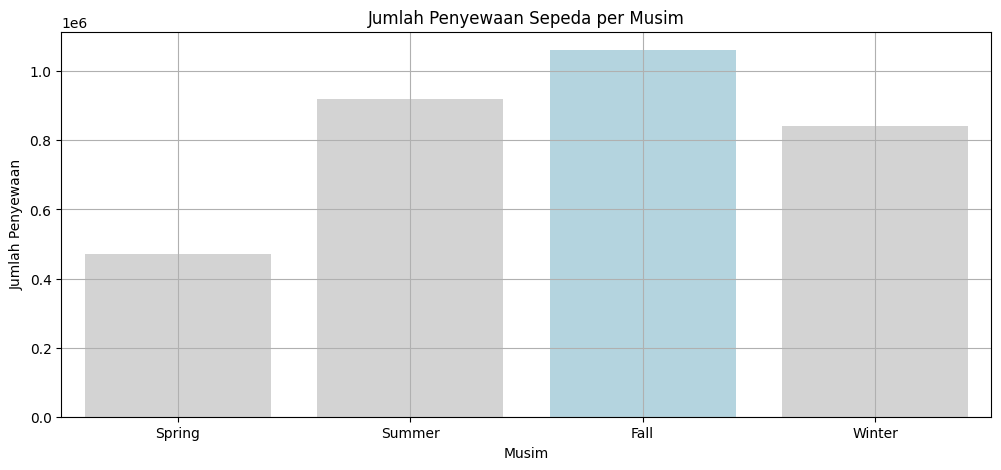

In [74]:
# Menghitung jumlah penyewaan per musim
sum_rentals_by_season = bike_day_df.groupby('season')['cnt'].sum().reset_index()

# Mapping label musim
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
sum_rentals_by_season["season"] = sum_rentals_by_season["season"].map(season_labels)

# Mencari musim dengan jumlah penyewaan tertinggi
max_season = sum_rentals_by_season.loc[sum_rentals_by_season["cnt"].idxmax(), "season"]

# Menentukan warna batang
colors = ["lightblue" if season == max_season else "lightgray" for season in sum_rentals_by_season["season"]]

# Plot jumlah penyewaan per musim
plt.figure(figsize=(12, 5))
sns.barplot(x="season", y="cnt", data=sum_rentals_by_season, palette=colors)

plt.title("Jumlah Penyewaan Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa faktor musim memiliki pengaruh terhadap jumlah penyewaan sepeda. Terlihat bahwa jumlah penyewa mengalami variasi di setiap musim, dengan musim gugur menjadi periode di mana jumlah penyewaan sepeda mencapai angka tertinggi dibandingkan dengan musim lainnya. Hal ini dapat disebabkan oleh kondisi cuaca yang lebih nyaman dan mendukung aktivitas bersepeda, sehingga menarik lebih banyak pengguna untuk menyewa sepeda pada musim tersebut.

### Pertanyaan 2: Di bulan apa penyewaan sepeda mencapai jumlah tertinggi?

C:\Users\User\AppData\Local\Temp\ipykernel_32604\878555671.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette=colors)


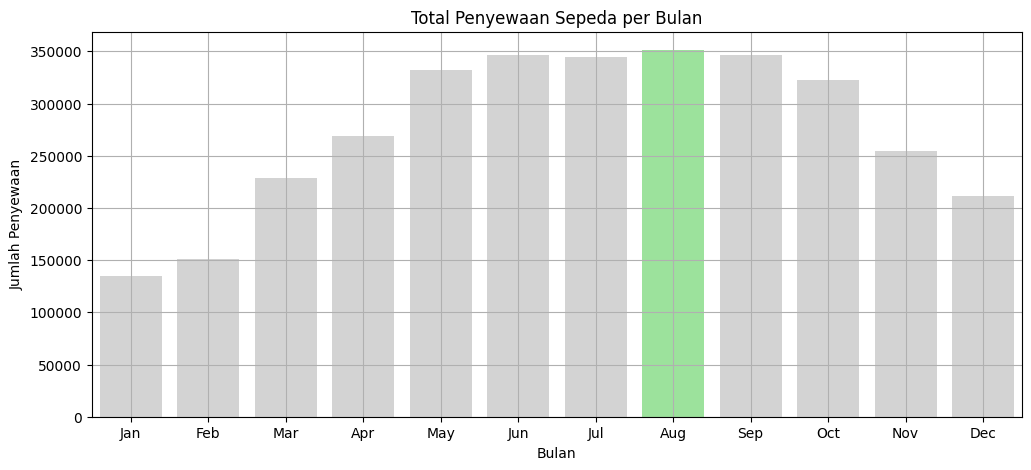

In [75]:
# Menghitung total penyewaan per bulan
monthly_trend = bike_day_df.groupby("mnth")["cnt"].sum()

# Mapping label bulan
month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
monthly_trend.index = monthly_trend.index.map(month_labels)

# Menentukan bulan dengan jumlah penyewaan tertinggi
max_month = monthly_trend.idxmax()

# Menentukan warna batang (hijau muda untuk yang tertinggi, abu-abu untuk lainnya)
colors = ["lightgreen" if month == max_month else "lightgray" for month in monthly_trend.index]

# Plot jumlah penyewaan per bulan
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette=colors)

plt.title("Total Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa bulan Agustus merupakan puncak tertinggi dalam jumlah penyewaan sepeda dibandingkan dengan bulan lainnya. Hal ini menunjukkan bahwa pada bulan tersebut, minat masyarakat dalam menggunakan sepeda untuk beraktivitas, baik untuk rekreasi maupun transportasi, mencapai tingkat yang paling tinggi. Faktor-faktor seperti kondisi cuaca yang mendukung, musim liburan, serta meningkatnya aktivitas luar ruangan kemungkinan besar menjadi penyebab utama tingginya angka penyewaan sepeda di bulan Agustus.

### Pertanyaan 3: Bagaimana perbandingan penyewaan sepeda bulanan pada tahun 2011 dan 2012?

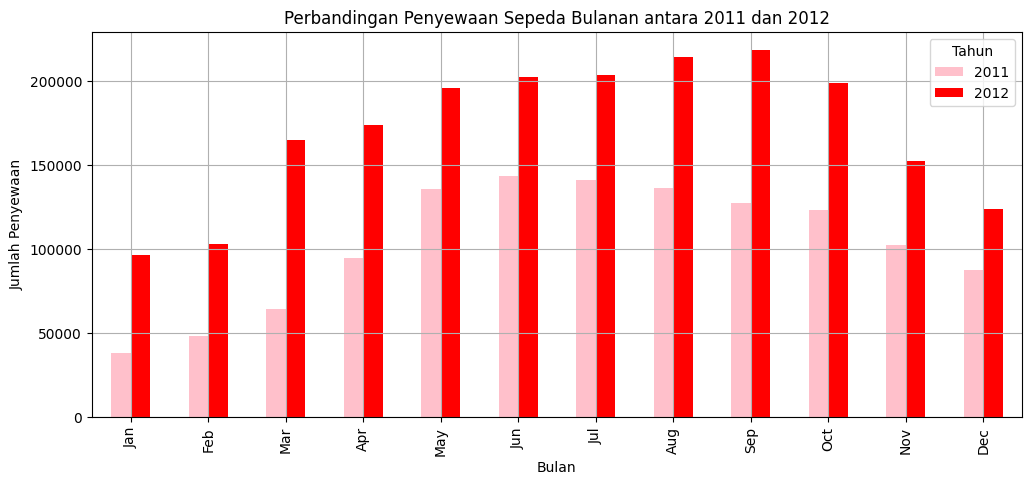

In [76]:
# Mengelompokkan data berdasarkan tahun dan bulan, lalu unstack untuk membuat tabel pivot
monthly_year_trend = bike_day_df.groupby(["yr", "mnth"])["cnt"].sum().unstack()

# Mapping label bulan
month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
monthly_year_trend.columns = monthly_year_trend.columns.map(month_labels)
monthly_year_trend.index = ["2011", "2012"]

# Plot data dengan warna berbeda untuk tiap tahun
monthly_year_trend.T.plot(kind="bar", figsize=(12, 5), color=["pink", "red"])

plt.title("Perbandingan Penyewaan Sepeda Bulanan antara 2011 dan 2012")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa jumlah penyewaan sepeda pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011 di setiap bulan.

### Pertanyaan 4: Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?

C:\Users\User\AppData\Local\Temp\ipykernel_32604\3621132315.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workingday_trend.index, y=workingday_trend.values, palette=colors)


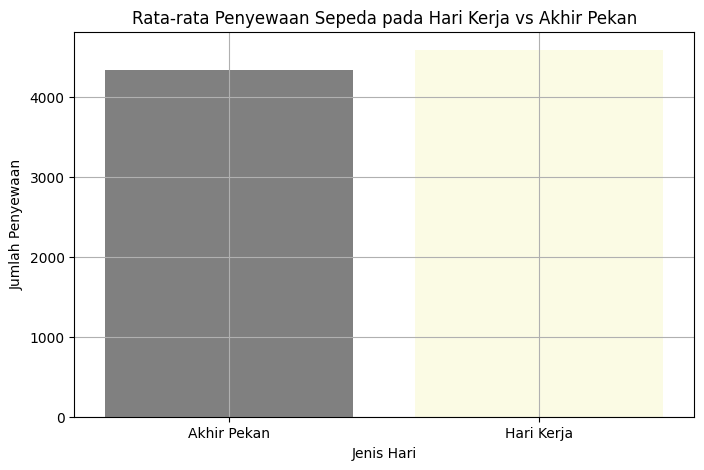

In [77]:
# Mengelompokkan data berdasarkan hari kerja/akhir pekan dan menghitung rata-rata penyewaan
workingday_trend = bike_day_df.groupby("workingday")["cnt"].mean()
workingday_trend.index = workingday_trend.index.map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Menentukan warna berdasarkan nilai tertinggi
colors = ["gray", "lightyellow"] if workingday_trend["Hari Kerja"] > workingday_trend["Akhir Pekan"] else ["lightyellow", "gray"]

plt.figure(figsize=(8, 5))
sns.barplot(x=workingday_trend.index, y=workingday_trend.values, palette=colors)
plt.title("Rata-rata Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa rata-rata jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai moda transportasi sehari-hari, seperti untuk bekerja atau keperluan lainnya pada hari kerja. 

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

### Manual Grouping

In [78]:
# Menentukan label untuk musim
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
bike_day_df['season_group'] = bike_day_df['season'].map(season_labels)

# Menentukan label untuk kondisi cuaca
weathersit_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
bike_day_df['weather_group'] = bike_day_df['weathersit'].map(weathersit_labels)

# Mengelompokkan data berdasarkan musim dan kondisi cuaca
grouped_data = bike_day_df.groupby(['season_group', 'weather_group'])['cnt'].mean().reset_index()

display(grouped_data)

,season_group,weather_group,cnt
0,Fall,Clear,5878.257353
1,Fall,Light Snow,2751.750000
2,Fall,Mist,5222.479167
3,Spring,Clear,2811.135135
4,Spring,Light Snow,934.750000
5,Spring,Mist,2357.166667
6,Summer,Clear,5548.548673
7,Summer,Light Snow,1169.000000
8,Summer,Mist,4236.705882
9,Winter,Clear,5043.563107


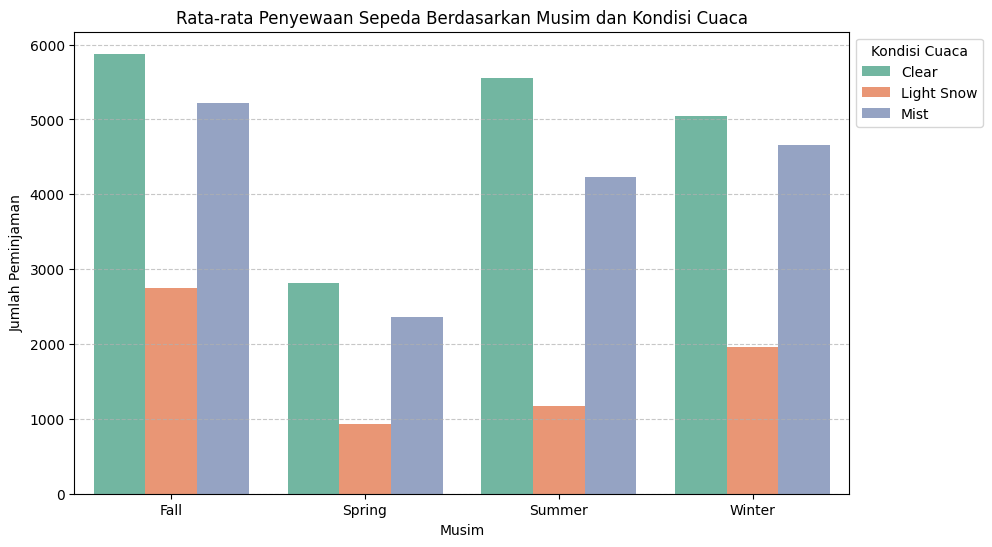

In [79]:
# Atur ukuran figure
plt.figure(figsize=(10, 6))

# Buat bar plot
sns.barplot(data=grouped_data, x="season_group", y="cnt", hue="weather_group", palette="Set2")

# Atur judul dan label
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Kondisi Cuaca", bbox_to_anchor=(1, 1))  # Pindahkan legend ke kanan atas
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

- Pengguna cenderung lebih banyak menyewa sepeda saat musim gugur dan panas, terutama ketika cuaca cerah.
- Kondisi cuaca yang lebih ekstrem seperti hujan lebat atau salju cenderung menurunkan jumlah peminjaman sepeda.

### Binning

In [80]:
# Mengelompokkan nilai suhu ('temp') ke dalam kategori: Dingin, Sedang, dan Panas
bike_day_df['temp_category'] = pd.cut(bike_day_df['temp'], bins=[0, 0.3, 0.6, 1], labels=['Dingin', 'Sedang', 'Panas'])

# Mengelompokkan jumlah penyewaan ('cnt') ke dalam kategori: Rendah, Sedang, dan Tinggi
bike_day_df['rental_category'] = pd.cut(bike_day_df['cnt'], bins=[0, 2000, 4000, 10000], labels=['Rendah', 'Sedang', 'Tinggi'])

# Menghitung jumlah data dalam setiap kombinasi kategori suhu dan kategori penyewaan
grouped_binned_data = bike_day_df.groupby(['temp_category', 'rental_category']).size().reset_index(name='jumlah')

# Menampilkan hasil pengelompokan
display(grouped_binned_data)

C:\Users\User\AppData\Local\Temp\ipykernel_32604\1544303355.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_binned_data = bike_day_df.groupby(['temp_category', 'rental_category']).size().reset_index(name='jumlah')


,temp_category,rental_category,jumlah
0,Dingin,Rendah,69
1,Dingin,Sedang,53
2,Dingin,Tinggi,13
3,Sedang,Rendah,27
4,Sedang,Sedang,107
5,Sedang,Tinggi,208
6,Panas,Rendah,2
7,Panas,Sedang,21
8,Panas,Tinggi,231


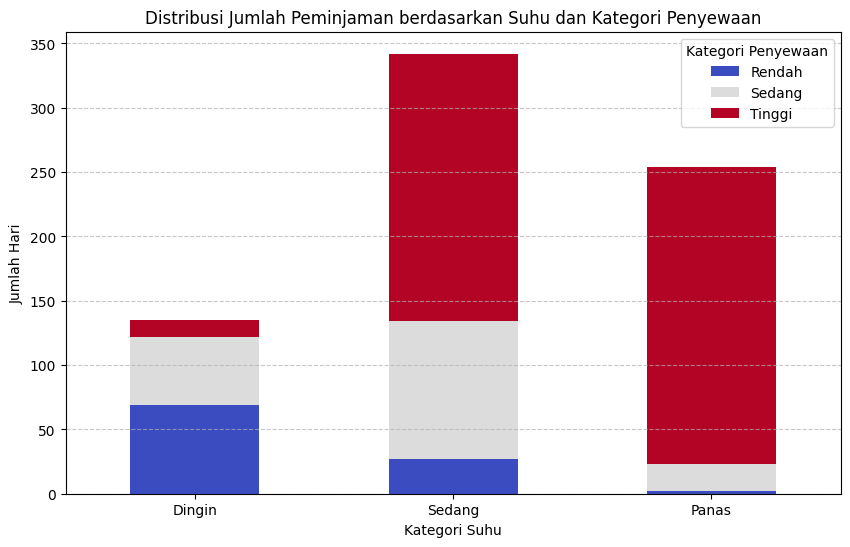

In [81]:
# Membuat pivot table untuk visualisasi
pivot_table = grouped_binned_data.pivot(index='temp_category', columns='rental_category', values='jumlah')

# Plot stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Menambahkan judul dan label
plt.title('Distribusi Jumlah Peminjaman berdasarkan Suhu dan Kategori Penyewaan')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Hari')
plt.legend(title='Kategori Penyewaan')
plt.xticks(rotation=0)  # Membuat label x tetap horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

Berdasarkan visualisasi diatas, pada hari-hari dengan suhu dingin sebagian besar penyewaan sepeda berada dalam kategori rendah hingga sedang, dengan hanya sedikit hari yang memiliki jumlah penyewaan tinggi. Sementara itu, pada suhu sedang, mayoritas hari menunjukkan jumlah penyewaan yang tinggi, diikuti oleh kategori sedang, dan sangat sedikit hari dengan penyewaan rendah. Hal ini menunjukkan bahwa suhu sedang merupakan kondisi optimal bagi penyewaan sepeda. Sedangkan pada suhu panas, sebagian besar hari didominasi oleh jumlah penyewaan yang tinggi, dengan hampir tidak ada hari yang memiliki penyewaan rendah. Ini mengindikasikan bahwa pengguna cenderung tetap aktif menyewa sepeda meskipun suhu lebih panas.

## Conclusion

- Conclusion Pertanyaan 1 : Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa faktor musim memiliki pengaruh terhadap jumlah penyewaan sepeda. Terlihat bahwa jumlah penyewa mengalami variasi di setiap musim, dengan musim gugur menjadi periode di mana jumlah penyewaan sepeda mencapai angka tertinggi dibandingkan dengan musim lainnya. Hal ini dapat disebabkan oleh kondisi cuaca yang lebih nyaman dan mendukung aktivitas bersepeda, sehingga menarik lebih banyak pengguna untuk menyewa sepeda pada musim tersebut.
- Conclusion Pertanyaan 2 : Berdasarkan visualisasi di atas, dapat disimpulkan bahwa bulan Agustus merupakan puncak tertinggi dalam jumlah penyewaan sepeda dibandingkan dengan bulan lainnya. Hal ini menunjukkan bahwa pada bulan tersebut, minat masyarakat dalam menggunakan sepeda untuk beraktivitas, baik untuk rekreasi maupun transportasi, mencapai tingkat yang paling tinggi. Faktor-faktor seperti kondisi cuaca yang mendukung, musim liburan, serta meningkatnya aktivitas luar ruangan kemungkinan besar menjadi penyebab utama tingginya angka penyewaan sepeda di bulan Agustus.
- Conclusion Pertanyaan 3 : Berdasarkan visualisasi di atas, dapat disimpulkan bahwa jumlah penyewaan sepeda pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011 di setiap bulan.
- Conclusion Pertanyaan 4 : Berdasarkan visualisasi di atas, dapat disimpulkan bahwa rata-rata jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai moda transportasi sehari-hari, seperti untuk bekerja atau keperluan lainnya pada hari kerja. 

In [82]:
bike_day_df.to_csv("data_bersih.csv", index=False)